<a href="https://colab.research.google.com/github/ishwarvenugopal/ML-DL_Implementation/blob/master/Deep_Learning/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from sklearn.model_selection import KFold
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Understanding the MNIST dataset

In [64]:
#Load the dataset 
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [65]:
print('Train: X={}, y={}'.format(X_train.shape,y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape,y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


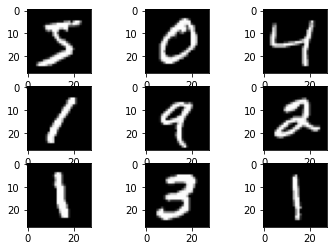

In [66]:
#Plot the first few images

for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i], cmap= plt.get_cmap('gray'))
plt.show()

# Implementing a CNN with K-Fold Cross validation evaluation

In [67]:
#Load train and test dataset

def load_dataset():
  #load dataset
  (X_train,y_train),(X_test,y_test) = mnist.load_data()
  #Reshaping the data arrays to have a single color channel
  X_train = X_train.reshape(X_train.shape[0],28,28,1)
  X_test = X_test.reshape(X_test.shape[0],28,28,1)
  #One-hot encoding of the target value
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train,y_train, X_test,y_test

In [68]:
#Normalising the pixel values for each image 
#Note: The pixel values are unsigned integers in the range between black and white, i.e 0 and 255

def prep_pixels(train,test):
  #converting from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  #normalise to range 0-1
  max_pixel=255
  train_norm = train_norm/max_pixel
  test_norm = test_norm/max_pixel
  return train_norm, test_norm

In [69]:
#Creating a CNN model

def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))

  opt = SGD(lr=0.01,momentum=0.9)
  model.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [70]:
#Evaluating a model using k-fold cross validation

def evaluate_model(dataX,dataY,n_folds=5):
  scores = []
  histories = []
  #prepare cross-validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  #enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    model= define_model()
    X_train, y_train, X_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(X_train, y_train, epochs =10, batch_size =32, validation_data = (X_test,y_test), verbose = 1 )
    _,acc = model.evaluate(X_test, y_test, verbose =1)
    print('Accuracy : {}'.format(acc*100))
    scores.append(acc)
    histories.append(history) 
  return scores, histories

In [71]:
#Plotting the diagnostic learning curves

def summarize_diagnostics(histories):
  for i in range(len(histories)):
    plt.subplot(2,1,1)
    plt.title("Cross entropy loss")
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')

    plt.subplot(2,1,2)
    plt.title("Classification Accuracy")
    plt.plot(histories[i].history['loss'],color='blue',label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

In [72]:
def summarize_performance(scores):
  scores = np.array(scores)
  print("Accuracy: mean = {}  std= {}  n = {}".format(scores.mean(),scores.std(), len(scores)))
  plt.boxplot(scores)
  plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 596us/step - loss: 0.1945 - accuracy: 0.9393 - val_loss: 0.0955 - val_accuracy: 0.9737
Epoch 2/10
48000/48000 [==============================] - 28s 584us/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.0681 - val_accuracy: 0.9797
Epoch 3/10
48000/48000 [==============================] - 28s 586us/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0635 - val_accuracy: 0.9808
Epoch 4/10
48000/48000 [==============================] - 28s 589us/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0578 - val_accuracy: 0.9839
Epoch 5/10
48000/48000 [==============================] - 28s 584us/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0646 - val_accuracy: 0.9825
Epoch 6/10
48000/48000 [==============================] - 28s 585us/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0647 - val_accuracy: 0.9825
Epoch 7/10
48000/48000 [==============================] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


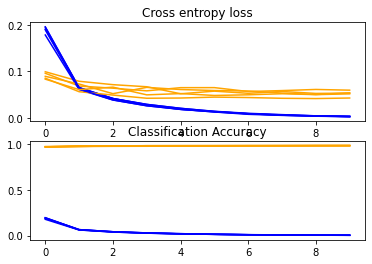

Accuracy: mean = 0.9872999906539917  std= 0.001002217296222281  n = 5


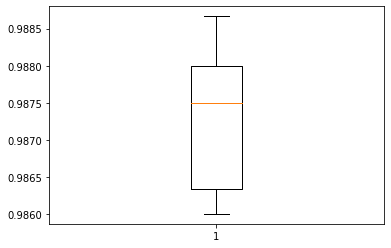

In [73]:
X_train, y_train, X_test, y_test = load_dataset()
X_train, X_test = prep_pixels(X_train, X_test)
scores, histories = evaluate_model(X_train, y_train)
summarize_diagnostics(histories)
summarize_performance(scores)

In [75]:
# # make a prediction for a new image.

# # load and prepare the image
# def load_image(filename):
# 	# load the image
# 	img = load_img(filename, grayscale=True, target_size=(28, 28))
# 	# convert to array
# 	img = img_to_array(img)
# 	# reshape into a single sample with 1 channel
# 	img = img.reshape(1, 28, 28, 1)
# 	# prepare pixel data
# 	img = img.astype('float32')
# 	img = img / 255.0
# 	return img

In [78]:
# # load the image
# img = load_image('/content/sample_image.png')
# # predict the class
# model = define_model()
# digit = model.predict_classes(img)
# print(digit[0])

# A Simpler CNN Model (without Cross-validation)

In [81]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_22 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)              

In [82]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [84]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 40s 834us/step - loss: 0.0970 - accuracy: 0.9695 - val_loss: 0.0689 - val_accuracy: 0.9803
Epoch 2/10
48000/48000 [==============================] - 40s 828us/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0645 - val_accuracy: 0.9827
Epoch 3/10
48000/48000 [==============================] - 40s 825us/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 4/10
48000/48000 [==============================] - 40s 831us/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0386 - val_accuracy: 0.9895
Epoch 5/10
48000/48000 [==============================] - 40s 825us/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0428 - val_accuracy: 0.9894
Epoch 6/10
48000/48000 [==============================] - 40s 826us/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0392 - val_accuracy: 0.9902
Epoch 7/10
48000/48000 [==============================] 

In [85]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 287us/step


0.9869999885559082

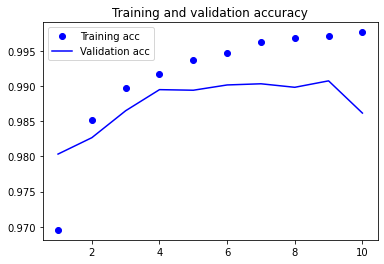

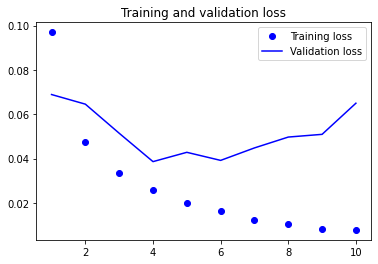

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()